<a href="https://colab.research.google.com/github/r-malaga/PJE-09/blob/main/Compilation_of_chosen_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importations #

On importe ici l'entiereté des bibliothèques que nous avons utilisé

In [ ]:
### Importing Dataset """
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import random
import pickle
# Visualization
import plotly.express as px # for data visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statistics
# Skleran
from sklearn.datasets import make_swiss_roll     # for creating swiss roll
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA      # for kernel PCA dimensionality reduction
from sklearn.decomposition import NMF            # for NMF dimensionality reduction
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA      #for SparsePCA dimensionality reduction
from sklearn.decomposition import TruncatedSVD   # for TruncatedSVD dimensionality reduction
from scipy.sparse import csr_matrix

# TensorFlow/Keras
import keras
from keras import layers
from keras import models

# Analyse de Fourier
from numpy.fft import fft, fftfreq

# Bibliothèques de calcul
import math

# Normalisation des données
from sklearn.preprocessing import MinMaxScaler

# Time computing
import time



Utile UNIQUEMENT pour récupérer l'apprentissage des autoencoders

In [ ]:
# # Importing time series data
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Creating Dataset #

*Attention, lancer toute cette sous-partie d'un coup !!*

##Récupération des données depuis le drive

In [ ]:
# # Chemin d'accès vers google drive
# # Importing time series data
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# ###Importation du chemin d'accès vers la base de données
# data_signals_DataFrame=pd.read_csv('/content/drive/MyDrive/PJE 9/base_signaux.csv', sep= ';', header=None)  #data_signals is a DataFrame here

In [ ]:
# chemin vers github
url = r'https://raw.githubusercontent.com/r-malaga/PJE-09/main/base_signaux.csv'
data_signals_DataFrame = pd.read_csv(url, sep = ';', header = None)
data_signals_DataFrame

,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,33.251298,46.833385,21.874739,17.478818,16.168080,34.260953,15.601953,10.872394,14.416825,14.745224,...,4.366856,4.684898,3.389950,5.204934,4.186140,4.207592,3.484886,4.708521,4.138009,4.358481
2,66.032994,91.964342,43.544248,34.903418,32.217516,68.239046,31.176699,21.730520,28.805522,29.463993,...,8.733263,9.369211,6.779630,10.409127,8.371962,8.414799,6.969503,9.416549,8.275621,8.716497
3,97.883049,133.762476,64.805796,52.219753,48.030802,101.653958,46.697078,32.560133,43.138029,44.129907,...,13.098770,14.052356,10.168768,15.611838,12.557147,12.621236,10.453583,14.123589,12.412438,13.073583
4,128.354437,170.738380,85.461625,69.374108,63.492707,134.230417,62.136026,43.347033,57.386416,58.716667,...,17.462929,18.733749,13.557095,20.812325,16.741378,16.826520,13.936857,18.829148,16.548062,17.429276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,-68.853464,-191.002646,17.873677,-263.756501,-223.740411,-331.455550,-37.377699,-262.289861,-40.118696,171.248259,...,42.657727,213.546703,-196.427925,149.822185,90.881463,89.413732,91.991893,261.996909,358.387519,26.549683
4997,-40.802382,-153.978867,22.870768,-270.476675,-226.634727,-322.717735,-44.034787,-262.902232,-26.719587,179.684311,...,39.119149,212.301846,-194.706047,149.207530,90.106353,85.284128,90.918035,264.227467,358.474068,27.610644
4998,-13.742069,-115.716330,29.166829,-276.360099,-228.300459,-311.227520,-50.639876,-263.214462,-13.175717,187.743053,...,35.580406,211.033432,-192.974492,148.566292,89.327402,81.147345,89.841806,266.429782,358.526319,28.676206
4999,11.903412,-77.898755,36.633740,-281.388159,-228.753362,-297.051285,-57.181901,-263.221914,0.486967,195.414015,...,32.041867,209.741686,-191.233444,147.898471,88.544728,77.003762,88.763320,268.603632,358.544245,29.746218


In [ ]:
n_s = len(data_signals_DataFrame.columns)  ##n_s est le nombre de signaux (colonnes) dans la base de données
data_signals_DataFrame.columns = ['Signal n°'+str(k+1) for k in range(n_s)]

In [ ]:
data_signals_numpy = data_signals_DataFrame.to_numpy()
X = data_signals_numpy

##Signaux de test

In [ ]:
#Création du DataFrame contenant la base de données de signaux de training
dic_s = {'Signal n°1': X[:,0]}
for i in range(10, len(X[0]), 10):
  dic_s['Signal n°' + str(i)] = X[:,i]
dic_s['Signal n°360'] = X[:,-1]
df_s = pd.DataFrame(dic_s, index = [k for k in range(len(X[:,0]))]) #DataFrame des signaux de travail

##Remove signaux de travail des signaux d'entrainement





In [ ]:
### On supprime les signaux qui serviront de base de données test
del data_signals_DataFrame['Signal n°1']
for i in range(10, len(X[0])+1, 10):
  del data_signals_DataFrame['Signal n°' + str(i)]

In [ ]:
### Stockage dans des variables parlantes : X pour training, Y pour test
X = data_signals_DataFrame.to_numpy()
Y = df_s
X.shape

(5001, 323)

##Stockage des valeurs de temps

In [ ]:
### On a vu que le pas de temps dans la bdd était du 1s, donc on a recréé la liste des pas de temps manuellement
T = np.array([k for k in range(len(X))]) # T is the list of time resolution

#Analyse fréquentielle de la base de donnée

Cette partie se consacre à de l'analyse de Fourier de base de données

##Application à la base de donnée

Variables sur lesquelles appliquer l'analyse de Fourier :


*   data_signals_numpy : contient les valeurs de tous les signaux de la base de données, training + tests compris
*   X : contient les valeurs de tous les signaux de la base de données training
*   Y : contient les valeurs de tous les signaux de la base de données tests




WARNING : Lancer tout d'un coup pour chacune des applications, pour éviter les confusions de variables car certaines ont le même nom entre les données analysées.
Ex : Lancer d'un coup Application à data_signals_numpy_f

###Application à data_signals_numpy_f

####Paramètres de la transformée de Fourier

In [ ]:
#Définition des paramètres de la transformée de Fourier
N = len(data_signals_numpy)    #Nombre de points (= pas de temps) dans le signal
Te = 1/100                    #C.f. Morgane, fréquence d'échantillonnage 10Hz, critère de Shannon. J'ai pris ue coeff de sécurité de 10 ce qui fait une fréquence d'échantillonage de 100 Hz.

####Transformée de Fourier

#####Traitement et tracés

*L'abréviation dsnf sera utilisée pour désigner data_signals_numpy_f*

In [ ]:
ind = 0
dic_fourier_dsnf = {}  #Ce dictionnaire contient les valeurs d'analyse de Fourier pour chacun des signaux à chaque fréquence
dic_fourier_freq_max = {}  #Ce dictionnaire contient les valeurs des fréquences principales de chacun des signaux
for k in range(len(data_signals_numpy[0])):

  #Transformée de Fourier
  data_signals_numpy_f = fft(data_signals_numpy[:,ind])  #On applique la fft sur chacun des signaux

  freq = fftfreq(N,
                Te
                )  # Fréquences de la transformée de Fourier

  # On garde uniquement les fréquences positives
  freq_pos = freq[:N//2]

  # On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives
  S_abs = np.abs(data_signals_numpy_f[:N//2])
  df_four = pd.DataFrame(S_abs,
                        index = freq_pos,
                        columns = ['Amplitude Fourier signal']
                        )

  # Normalisation de l'amplitude
  scaler_f = MinMaxScaler()
  S_norm = scaler_f.fit_transform(df_four)
  dic_fourier_dsnf['Transformée Fourier Signal n°'+ str(ind+1)] = [S_norm[k,0]  for k in range(len(S_norm))]

  # Acquisition fréquence principale
  index_max = np.where(S_norm == max(S_norm))
  #print(index_max)
  freq_principale = freq_pos[index_max[0]]
  dic_fourier_freq_max['FP ' + str(ind+1)] = freq_principale

  #Incrémentation d'étape
  ind+=1

df_four_dsnf = pd.DataFrame(dic_fourier_dsnf,
                            index = freq_pos
                            )

df_four_val_max = pd.DataFrame(dic_fourier_freq_max.values(),
                               index = dic_fourier_freq_max.keys(),
                               columns = ['Fréquences principales issues de la bdd training + test']
                               )

In [ ]:
#Tracé transformée de Fourier
n_signal = random.randint(1,len(data_signals_numpy[0]))
fig_f = px.line(df_four_dsnf['Transformée Fourier Signal n°' + str(n_signal)],
                title = 'Transformée de Fourier pour le signal n°' + str(n_signal) + ' issue de la base de données training + tests'
               )
fig_f.update_layout(xaxis_title = 'Fréquence (Hz)',
                    yaxis_title = 'Amplitude normalisée'
                    )
fig_f.update_xaxes(range=[0-2, max(df_four_dsnf.index)+5])
fig_f.show()

In [ ]:
#Tracé répartition fréquences principales
fig_f_max = px.bar(df_four_val_max,
                   title = 'Fréquences principales de la base de données training + tests'
                   )
fig_f_max.update_layout(xaxis_title = 'n° signal',
                        yaxis_title = 'Fréquence (Hz)'
                        )
fig_f_max.show()

###Application à X

####Paramètres de la transformée de Fourier

In [ ]:
#Définition des paramètres de la transformée de Fourier
N = len(X)    #Nombre de points (= pas de temps) dans le signal
Te = 1/100                    #C.f. Morgane, fréquence d'échantillonnage 10Hz, critère de Shannon. J'ai pris ue coeff de sécurité de 10 ce qui fait une fréquence d'échantillonage de 100 Hz.

####Transformée de Fourier

#####Traitement et tracés

*L'abréviation dsnf sera utilisée pour désigner data_signals_numpy_f*

In [ ]:
ind = 0
dic_fourier_X = {}  #Ce dictionnaire contient les valeurs d'analyse de Fourier pour chacun des signaux à chaque fréquence
dic_fourier_freq_max = {}    #Ce dictionnaire contient les valeurs des fréquences principales de chacun des signaux
for k in range(len(X[0])):

  #Transformée de Fourier
  X_f = fft(X[:,ind])  #On applique la fft sur chacun des signaux

  freq = fftfreq(N,
                Te
                )  # Fréquences de la transformée de Fourier

  # On garde uniquement les fréquences positives
  freq_pos = freq[:N//2]

  # On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives
  S_abs = np.abs(X_f[:N//2])
  df_four = pd.DataFrame(S_abs,
                        index = freq_pos,
                        columns = ['Amplitude Fourier signal']
                        )

  # Normalisation de l'amplitude
  scaler_f = MinMaxScaler()
  S_norm = scaler_f.fit_transform(df_four)
  dic_fourier_X['Transformée Fourier Signal n°'+ str(ind+1)] = [S_norm[k,0]  for k in range(len(S_norm))]

  # Acquisition fréquence principale
  index_max = np.where(S_norm == max(S_norm))
  #print(index_max)
  freq_principale = freq_pos[index_max[0]]
  dic_fourier_freq_max['FP ' + str(ind+1)] = freq_principale

  #Incrémentation d'étape
  ind+=1

df_four_X = pd.DataFrame(dic_fourier_X,
                         index = freq_pos
                            )

df_four_val_max = pd.DataFrame(dic_fourier_freq_max.values(),
                               index = dic_fourier_freq_max.keys(),
                               columns = ['Fréquences principales issues de la bdd training']
                               )

In [ ]:
#Tracé transformée de Fourier
n_signal = random.randint(1,len(X[0]))
fig_f = px.line(df_four_dsnf['Transformée Fourier Signal n°' + str(n_signal)],
                title = 'Transformée de Fourier pour le signal n°' + str(n_signal) + ' issue de la base de données training'
               )
fig_f.update_layout(xaxis_title = 'Fréquence (Hz)',
                    yaxis_title = 'Amplitude normalisée'
                    )
fig_f.update_xaxes(range=[0-2, max(df_four_X.index)+5])
fig_f.show()

In [ ]:
#Tracé répartition fréquences principales
fig_f_max = px.bar(df_four_val_max,
                   title = 'Fréquences principales de la base de données training'
                   )
fig_f_max.update_layout(xaxis_title = 'n° signal',
                        yaxis_title = 'Fréquence (Hz)'
                        )
fig_f_max.show()

# Graphical visualization #

Dans cette rubrique, nous mettons en place 2 fonctions qui permettent de tracer des graphiques, et une rubrique qui permet de tracer le signal que l'on souhaite de la base de données

##Fonction Plot3D et Plot2D

In [ ]:
# @title
def Plot3D(X, y, plot_name): #X contains dimension 1 (x-axis) data in first column, dimension 2 (y-axis) data in second one, dimension 3 (z-axis) data in third one ; colors contains the colors of the marks if they exist ; plot_name is the name of the graph
    fig = px.scatter_3d(None,
                        x=X[:,0], y=X[:,1], z=X[:,2],
                        color=y,
                        height=800, width=800
                       )
    # Update chart looks
    fig.update_layout(title_text=plot_name,
                      showlegend=False,
                      legend=dict(orientation="h", yanchor="top", y=0, xanchor="center", x=0.5),
                      scene_camera=dict(up=dict(x=0, y=0, z=1),
                                            center=dict(x=0, y=0, z=-0.1),
                                            eye=dict(x=1.5, y=1.75, z=1)),
                                            margin=dict(l=0, r=0, b=0, t=0),
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             ),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black',
                                              gridcolor='#f0f0f0',
                                              title_font=dict(size=10),
                                              tickfont=dict(size=10),
                                             )))
    # Update marker size
    fig.update_traces(marker=dict(size=3,
                                  line=dict(color='black', width=0.1)))
    fig.update(layout_coloraxis_showscale=False)
    return fig


#----------------------------------------------
# Create a 2D scatter plot
def Plot2D(X, y, plot_name): #X contains dimension 1 (x-axis) data in first column, dimension 2 (y-axis) data in second column ; y contains colors of the marks if they exist, plot_name is the name of the graph
    # Create a scatter plot
    fig = px.line(None, x=X[:,0], y=X[:,1],
                     labels={
                         "x": "Dimension 1",
                         "y": "Dimension 2",
                     },
                  #opacity = 1,
                  color=y)

    # Change chart background color
    fig.update_layout(dict(plot_bgcolor = 'white'))

    # Update axes lines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                     showline=True, linewidth=1, linecolor='black')

    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                     zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                     showline=True, linewidth=1, linecolor='black')

    # Set figure title
    fig.update_layout(title_text=plot_name)

    # Update marker size
    fig.update_traces(marker=dict(size=5,
                                 line=dict(color='black', width=0.3)))
    return fig


##Example of a signal

In [ ]:
###Choix signal à tracer
signal = 50
###Tracé
signal_50 = data_signals_numpy[:,signal-1]     #Stockage des valeurs d'un signal en particulier
graphical_data =np.array((T, signal_50)).T
fig_ex = Plot2D(graphical_data, None, plot_name = 'Signal ' + str(signal))
fig_ex.update_layout(xaxis_title = 'Temps (s)',
                     yaxis_title = 'Amplitude',
    width=1200,  # Set the width of the plot
    height=700
                     )
fig_ex.show()

# Méthodes choisies







On note ici les méthodes que l'on souhaite analyser avec les indicateurs

In [ ]:
methods = ['PCA',
           'Kernel PCA',
           'Truncated SVD',
           'Autoencoder 1 couche',
           'Autoencoder 2 couches',
           'Autoencoder récurrent',
           'VAE'
          ]

# Number of generations

On créé ici les nombres de composantes principales qu'il y aura dans les méthodes de réduction de la dimensionnalité

In [ ]:
### Création de la liste des générations de composantes principales, et définition de paramètres utiles
pas = (len(X[0])-155+1)//10         #Définition d'un pas régulier pour les valeurs de 150 composantes de réduction jusqu'à la valeur (maximale) du nombre de signal
L_n = [m for m in range(1,50,10)] + [k for k in range(50, 130, 10)] + [k for k in range(131, 155, 5)] + [k for k in range(155, len(X[0]), pas)] #Liste des nombre de composantes de réduction qu'on aura lors de nos générations
print(L_n)
N_gen = len(L_n)  #Nombre de générations

###Pour les signaux tests, on rajoute des 0 partout où il faut pour pouvoir combler la place qu'il faut pour que les 2 bases de données gardent la même dimension, sinon les méthodes ne fonctionnent pas
Y_np = Y.to_numpy()
n_signaux_tests = len(Y_np[0])              #Nombre de signaux tests
Y_PCA = np.zeros((len(X), len(X[0])))
for i in range(len(Y_PCA)):
  for j in range(len(Y_PCA[0])):
    if i < len(Y_np) and j < len(Y_np[0]):
      Y_PCA[i,j] = Y_np[i,j]


## Signaux qu'on souhaite analyser la reconstruction
gen = L_n.index(136)
p = random.randint(0, len(X[0])-1) # Signal issue de la base de donnée d'entrainement dont on veut faire l'analyse de la reconstruction
q = random.randint(0, len(Y_np[0])-1)  # Signal issue de la base de donnée de test dont on veut faire l'analyse de la reconstruction à partir de la réduction dans la base créée lors du training

[1, 11, 21, 31, 41, 50, 60, 70, 80, 90, 100, 110, 120, 131, 136, 141, 146, 151, 155, 171, 187, 203, 219, 235, 251, 267, 283, 299, 315]


# Standard PCA  method#

On applique ici la méthode PCA pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests.

La seconde rubrique sert à voir rapidement visuellement les reconstructions

##Traitement

In [ ]:
L_decoded_vectors_PCA = []
L_test_PCA = []

### PCA ###
t_PCA = []

for n in L_n:
  start_PCA = time.time()
  model_PCA = PCA(n_components = n,
                  )
  reduced_vectors_PCA = model_PCA.fit_transform(X)
  red_vec_TEST_PCA = model_PCA.transform(Y_PCA)
  decoded_vectors_PCA = model_PCA.inverse_transform(reduced_vectors_PCA)
  decoded_TEST_PCA = model_PCA.inverse_transform(red_vec_TEST_PCA)
  L_decoded_vectors_PCA.append(decoded_vectors_PCA)
  L_test_PCA.append(decoded_TEST_PCA[:,0:n_signaux_tests])                    #On garde que les signaux qui ne sont pas des 0

# Time ends
  end_PCA = time.time()

# Computing time
  time_PCA = end_PCA - start_PCA
  t_PCA.append(time_PCA)
  print('Time taken for PCA: ', time_PCA)


Time taken for PCA:  0.21575689315795898
Time taken for PCA:  0.44222593307495117
Time taken for PCA:  0.47651219367980957
Time taken for PCA:  0.46630215644836426
Time taken for PCA:  0.4189915657043457
Time taken for PCA:  0.4177539348602295
Time taken for PCA:  0.45937323570251465
Time taken for PCA:  0.41296911239624023
Time taken for PCA:  0.5748207569122314
Time taken for PCA:  0.6341116428375244
Time taken for PCA:  0.7114348411560059
Time taken for PCA:  1.0873303413391113
Time taken for PCA:  1.130239486694336
Time taken for PCA:  1.07063889503479
Time taken for PCA:  0.733349084854126
Time taken for PCA:  0.8436365127563477
Time taken for PCA:  0.8284804821014404
Time taken for PCA:  0.9921722412109375
Time taken for PCA:  0.9114408493041992
Time taken for PCA:  0.9535055160522461
Time taken for PCA:  1.0918338298797607
Time taken for PCA:  1.2391119003295898
Time taken for PCA:  1.3518915176391602
Time taken for PCA:  1.7703697681427002
Time taken for PCA:  2.125044107437134

In [ ]:
# fig = px.scatter([k for k in range(5001)],
#                   reduced_vectors_PCA[:,50],
#                  title = 'Exemple d un signal réduit dans une base de dimension 151'
#                  )
# fig.update_layout(xaxis_title = 'Axe 1',
#                   yaxis_title = 'Axe 2')
# fig.show()

##Reconstruction visualisation

###Training data


In [ ]:
m=5
fig = px.line(None,
                x=T, y=X[:,p],
                color=None,
                title = 'Reconstruction d un signal d entrainement reconstruit avec ' + str(L_n[m]) + ' composantes de réduction'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_decoded_vectors_PCA[m][:,p],
                          name = 'Reconstructed signal'
                        )
              )
fig.show()

###Test data

In [ ]:
q = 2
fig = px.line(None,
              x=T, y=Y_np[:,q],
              color=None,
              title = 'Accurracy of test data (Signal n°' + str(q) +') reconstruction thank to the basis created during training with ' + str(L_n[gen])+ ' components of reduction'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_test_PCA[gen][:,q],
                          name = 'Reconstructed signal'
                          )
              )
fig.show()

# Kernel-PCA method #

On applique ici la méthode Kernel PCA pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests.

La seconde rubrique sert à voir rapidement visuellement les reconstructions

##Traitement

In [ ]:
t_k_PCA = []


### Kernel PCA ###
L_decoded_vectors_k_PCA = []
L_test_k_PCA = []


for n in L_n:
  # Time start
  start_k_PCA = time.time()
  model_k_PCA = KernelPCA(n_components = n,
                    kernel = 'linear',
                    fit_inverse_transform = True,
                  )
  reduced_vectors_k_PCA = model_k_PCA.fit_transform(X)
  decoded_vectors_k_PCA = model_k_PCA.inverse_transform(reduced_vectors_k_PCA)
  reduced_TEST_k_PCA = model_k_PCA.transform(Y_PCA)
  decoded_TEST_k_PCA = model_k_PCA.inverse_transform(reduced_TEST_k_PCA)

  L_decoded_vectors_k_PCA.append(decoded_vectors_k_PCA)
  L_test_k_PCA.append(decoded_TEST_k_PCA[:,0:n_signaux_tests])                  #On garde que les signaux qui ne sont pas des 0
# Time ends
  end_k_PCA = time.time()

# Computing time
  time_k_PCA = end_k_PCA - start_k_PCA
  print(time_k_PCA)
  t_k_PCA.append(time_k_PCA)

9.834620952606201
30.815104722976685
32.8457818031311
33.83890891075134
29.36272144317627
30.277493000030518
29.836809635162354
29.29631733894348
28.864761352539062
30.99019718170166
28.84806513786316
30.35567331314087
32.61433267593384
31.451565980911255
36.719013929367065
31.542515516281128
30.89815068244934
30.031341075897217
32.292365312576294
31.149587631225586
34.41054105758667
30.668787956237793
33.03685212135315
31.93725347518921
32.830167293548584
32.80807638168335
33.1052668094635
32.22915244102478
33.27050042152405


##Reconstruction visualisation

###Training data


In [ ]:
fig = px.line(None,
                x=T, y=X[:,p],
                color=None,
                title = 'Accurracy of training data reconstruction with ' + str(L_n[gen]) + 'reduction components'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_decoded_vectors_k_PCA[gen][:,p],
                          name = 'Reconstructed signal'
                        )
              )
fig.show()

###Test data

In [ ]:
g = 15
fig = px.line(None,
              x=T, y=Y_np[:,q],
              color=None,
              title = 'Accurracy of test data (Signal n°' + str(q) +') reconstruction thank to the basis created during training with ' + str(L_n[g])+ ' components of reduction'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_test_k_PCA[g][:,q],
                          name = 'Reconstructed signal'
                          )
              )
fig.show()



# NMF method (Retiré, réinsérer en cas de besoin - utiliser ctrl+/) #

Elle n'est pas à jour et actuellement inutilisable car elle n'avait pas d'intérêt

In [ ]:
# min_X = X.min()
# X = X + abs(min_X)

# t_NMF = []
# ### NMF ###
# L_decoded_vectors_NMF = []
# for n in L_n:
#   # Time start
#   start_NMF = time.time()

#   model_NMF = NMF(n_components= n,
#               init='random',
#               max_iter = 3000,
#               random_state=0)
#   reduced_vectors_NMF = model_NMF.fit_transform(X)      #q contains reduced data
#   decoded_vectors_NMF = model_NMF.inverse_transform(reduced_vectors_NMF)  #a contains initial data based on reduced data
#   decoded_vectors_NMF -= abs(min_X)
#   L_decoded_vectors_NMF.append(decoded_vectors_NMF)
#   # Time end
#   end_NMF = time.time()

#   # Computing time
#   time_NMF = end_NMF - start_NMF
#   t_NMF.append(time_NMF)

In [ ]:
# graphical_data_NMF = np.zeros((len(T), 2)) #graphical data is a (n, 2) matrix
# for i in range(len(T)):
#   graphical_data_NMF[i,0] = T[i]
#   graphical_data_NMF[i,1] = decoded_vectors_NMF[:,image][i]
# Plot2D(graphical_data_NMF, None, 'Signal ' + str(image) + ' reconstructed with NMF and ' + str(n) +' components')

# Sparse PCA (Retiré, réinsérer en cas de besoin)#

Elle n'est pas à jour et non fonctionnelle pour le moment

In [ ]:
# t_s_PCA = []
# ### Sparse PCA ###
# L_decoded_vectors_s_PCA = []
# for n in L_n:
#   # Time start
#   start_s_PCA = time.time()

#   model_s_PCA = SparsePCA(n_components = n,
#                           alpha = 0
#                   )
#   reduced_vectors_s_PCA = model_s_PCA.fit_transform(X)
#   decoded_vectors_s_PCA = model_s_PCA.inverse_transform(reduced_vectors_s_PCA)
#   L_decoded_vectors_s_PCA.append(decoded_vectors_s_PCA)

#   # Time end
#   end_s_PCA = time.time()

#   # Computing time
#   time_s_PCA = end_s_PCA - start_s_PCA
#   t_s_PCA.append(time_s_PCA)

In [ ]:
# graphical_data_s_PCA = np.zeros((len(T), 2)) #graphical data is a (n, 2) matrix
# for i in range(len(T)):
#   graphical_data_s_PCA[i,0] = T[i]
#   graphical_data_s_PCA[i,1] = decoded_vectors_s_PCA[:,image][i]
# Plot2D(graphical_data_s_PCA, None, 'Signal ' + str(image) + ' reconstructed with S PCA and ' + str(n) +' components')

# Truncated SVD

On applique ici la méthode SVD pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests.

La seconde rubrique sert à voir rapidement visuellement les reconstructions

In [ ]:
# @title Default title text
t_SVD = []
### Truncated SVD ###
L_decoded_vectors_SVD = []
L_test_SVD = []
for n in L_n:
  # Time start
  start_SVD = time.time()
  model_SVD = TruncatedSVD(n_components = n,
                      )
  reduced_vectors_SVD = model_SVD.fit_transform(X)
  decoded_vectors_SVD = model_SVD.inverse_transform(reduced_vectors_SVD)
  L_decoded_vectors_SVD.append(decoded_vectors_SVD)
  reduced_TEST_SVD = model_SVD.transform(Y_PCA)
  decoded_TEST_SVD = model_SVD.inverse_transform(reduced_TEST_SVD)
  L_test_SVD.append(decoded_TEST_SVD[:,0:n_signaux_tests])                      #On garde que les signaux qui ne sont pas des 0

  # Time end
  end_SVD = time.time()
  # Computing time
  time_SVD = end_SVD - start_SVD
  print(time_SVD)
  t_SVD.append(time_SVD)

0.23993253707885742
0.29268503189086914
0.41916894912719727
0.5034630298614502
0.3547651767730713
0.4562644958496094
0.486339807510376
0.45613765716552734
0.5650746822357178
0.5874423980712891
0.7269942760467529
1.0550978183746338
1.3701164722442627
1.5357186794281006
1.1468515396118164
0.915640115737915
1.0347225666046143
1.1901752948760986
0.9982564449310303
1.3290762901306152
1.2299816608428955
1.4854309558868408
1.7358639240264893
2.3542745113372803
1.8152849674224854
1.7240850925445557
1.993746042251587
2.073272466659546
2.1256368160247803


##Reconstruction visualisation

###Training data


In [ ]:
fig = px.line(None,
                x=T, y=X[:,p],
                color=None,
                title = 'Accurracy of training data reconstruction with ' + str(L_n[gen]) + 'reduction components'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_decoded_vectors_SVD[gen][:,p],
                          name = 'Reconstructed signal'
                        )
              )
fig.show()

###Test data

In [ ]:
fig = px.line(None,
              x=T, y=Y_np[:,q],
              color=None,
              title = 'Accurracy of test data (Signal n°' + str(q) +') reconstruction thank to the basis created during training with ' + str(L_n[gen])+ ' components of reduction'
              )
fig.add_trace(go.Scatter( x = T,
                          y = L_test_SVD[gen][:,q],
                          name = 'Reconstructed signal'
                          )
              )
fig.show()

# Autoencoder #

On applique ici la méthode AUTOENCODER 1 couche pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests. Téléchargez le fichier .pkl pour récuperer les donnés obtenues à partir d'essaies antérieures


In [ ]:
# ### Récupération de l'apprentissage déjà stocké
# file_path = r'/content/drive/MyDrive/PJE 9/' # change filepath as needed

# print('Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run code with new configurations')
# with open(file_path+'auto1_reconstructions.pkl', 'rb') as file:
#         [L_decoded_vectors_auto1,L_decoded_TEST_auto1] = pickle.load(file)

Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run code with new configurations


Application du méthode. Enlevez les # (Ctrl + /) pour faire tourner avec des altérations. Normalement, cela prends beaucoup de temps.

In [ ]:

t_auto = []
L_decoded_vectors_auto1 = []
L_decoded_TEST_auto1 = []
for n in L_n:
  start_auto = time.time()
  turns_a1 = 50

  latent_dim_a1 = n
  input_data_a1 = X
  maximum_a1 = np.amax(input_data_a1)
  input_data_a1 = input_data_a1/maximum_a1
  maximum_test_a1 = np.amax(Y_PCA)
  input_test_a1 = Y_PCA/maximum_test_a1  # SCALING WITH RESPECT TO GLOBAL MAX ? ;  YPCA USED BECAUSE INPUT DIMENSION MUST BE THE SAME FOR DIMENSIONALITY REDUCTION

  # Need to determine method of looping for different intermediary layers >= latent
  ###### Autoencoder standard - 2 layers ######
  encoder1 = models.Sequential([
      layers.Dense(latent_dim_a1, activation='tanh', input_shape=(input_data_a1.shape[1],)),
  ])
  decoder1 = models.Sequential([
      layers.Dense(input_data_a1.shape[1], activation='tanh', input_shape=(latent_dim_a1,)),
  ])

  # Autoencoder
  autoencoder1 = keras.Model(inputs=encoder1.input, outputs=decoder1(encoder1.output))
  autoencoder1.summary()

  autoencoder1.compile(loss='mse', optimizer='adam')

  history1 = autoencoder1.fit(input_data_a1, input_data_a1,
                  epochs=turns_a1, verbose=0) # Fitting to train data

  aut_predict1 = autoencoder1.predict(input_data_a1)*maximum_a1
  aut_TEST_a1 = autoencoder1.predict(input_test_a1)*maximum_test_a1 # PREDICT FOR TEST, NO FITTING

  decoded_vectors_auto1 = aut_predict1.reshape(input_data_a1.shape)
  decoded_TEST_auto1 = aut_TEST_a1.reshape(input_test_a1.shape)

  L_decoded_vectors_auto1.append(decoded_vectors_auto1)
  L_decoded_TEST_auto1.append(decoded_TEST_auto1)

  end_auto = time.time()
  time_auto = end_auto-start_auto
  print(time_auto)
  t_auto.append(time_auto)

**Visualisation**

Text(0.5, 1.0, 'Signal 195 reconstructed with Autoencoder and 315 components')

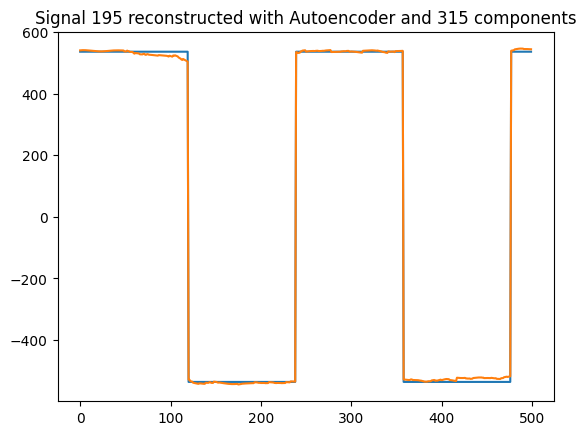

In [ ]:
lmt = 500
import matplotlib.pyplot as plt

graphical_data_auto =  L_decoded_vectors_auto1[-1][:lmt,p]
graph_x = X[:lmt,p]
plt.plot(graph_x)
plt.plot(graphical_data_auto)
plt.title('Signal ' + str(p) + ' reconstructed with Autoencoder and ' + str(n) +' components')


Text(0.5, 1.0, 'Signal 195 from the test set reconstructed with Autoencoder and 315 components')

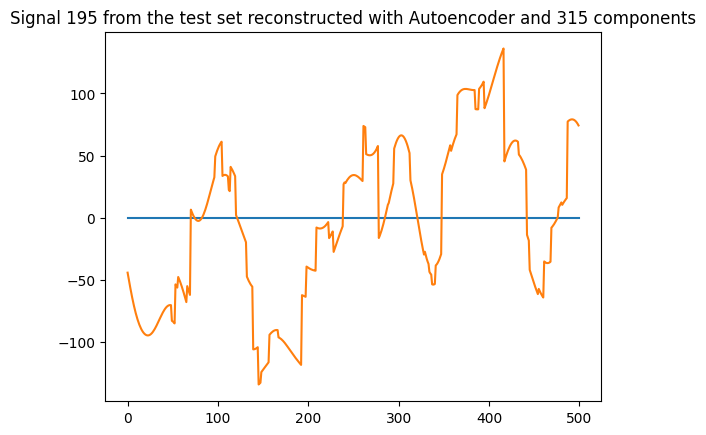

In [ ]:
graphical_TEST_auto = L_decoded_TEST_auto1[-1][:lmt,p] # plotting up until lmt, easier visualization
graph_ypca = Y_PCA[:lmt,p]

plt.plot(graph_ypca)
plt.plot(graphical_TEST_auto)
plt.title('Signal ' + str(p) + ' from the test set reconstructed with Autoencoder and ' + str(n) +' components')


# Autoencoder dense 2 couches #

On applique ici la méthode AUTOENCODER 2 couche pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests. Téléchargez le fichier .pkl pour récuperer les donnés obtenues à partir d'essaies antérieures

In [ ]:
# ### Récupération de l'apprentissage déjà stocké
# print('Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations')
# with open(  file_path+'auto2_reconstructions.pkl', 'rb') as file:
#         [L_decoded_vectors_auto2,L_decoded_TEST_auto2] = pickle.load(file)

Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations


Application du méthode. Enlevez les # (Ctrl + /) pour faire tourner avec des altérations. Normalement, cela prends beaucoup de temps.

In [ ]:


L_decoded_vectors_auto2 = []
L_decoded_TEST_auto2 = []
for n in L_n:
  start_a2 = time.time()
  turns_a2 = 50

  latent_dim_a2 = n
  input_data_a2 = X
  maximum_a2 = np.amax(input_data_a2)
  input_data_a2 = input_data_a2/maximum_a2
  maximum_test_a2 = np.amax(Y_PCA)
  input_test_a2 = Y_PCA/maximum_test_a2  # SCALING WITH RESPECT TO GLOBAL MAX ? ;  YPCA USED BECAUSE INPUT DIMENSION MUST BE THE SAME FOR DIMENSIONALITY REDUCTION

  # Need to determine method of looping for different intermediary layers >= latent
  dim_int = 175
  ###### Autoencoder standard - 2 layers ######
  encoder2 = models.Sequential([
      layers.Dense(dim_int, activation='tanh', input_shape=(input_data_a2.shape[1],)),
      layers.Dense(latent_dim_a2, activation = 'tanh')
  ])
  decoder2 = models.Sequential([
      layers.Dense(dim_int, activation='tanh', input_shape=(latent_dim_a2,)),
      layers.Dense(input_data_a2.shape[1], activation='tanh')
  ])

  # Autoencoder
  autoencoder2 = keras.Model(inputs=encoder2.input, outputs=decoder2(encoder2.output))
  autoencoder2.summary()

  autoencoder2.compile(loss='mse', optimizer='adam')

  history2 = autoencoder2.fit(input_data_a2, input_data_a2,
                  epochs=turns_a2, verbose=0) # Fitting to train data

  aut_predict2 = autoencoder2.predict(input_data_a2)*maximum_a2
  aut_TEST_a2 = autoencoder2.predict(input_test_a2)*maximum_test_a2 # PREDICT FOR TEST, NO FITTING

  decoded_vectors_auto2 = aut_predict2.reshape(input_data_a2.shape)
  decoded_TEST_auto2 = aut_TEST_a2.reshape(input_test_a2.shape)

  L_decoded_vectors_auto2.append(decoded_vectors_auto2)
  L_decoded_TEST_auto2.append(decoded_TEST_auto2)
  end_a2 = time.time()
  time_a2 = end_a2-start_a2
  print(time_a2)



**Visualization**

Text(0.5, 1.0, 'Signal 195 reconstructed with Autoencoder 2 layers and 315 components')

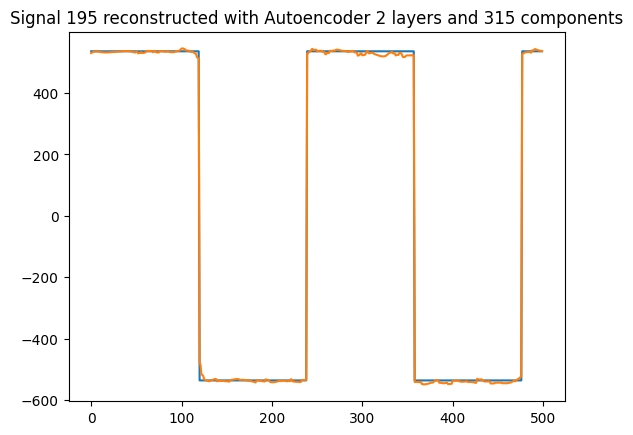

In [ ]:
lmt = 500
import matplotlib.pyplot as plt

graphical_data_auto2 =  L_decoded_vectors_auto2[-1][:lmt,p]
graph_x2 = X[:lmt,p]
plt.plot(graph_x2)
plt.plot(graphical_data_auto2)
plt.title('Signal ' + str(p) + ' reconstructed with Autoencoder 2 layers and ' + str(n) +' components')

Text(0.5, 1.0, 'Signal 195 from the test set reconstructed with Autoencoder 2l and 315 components')

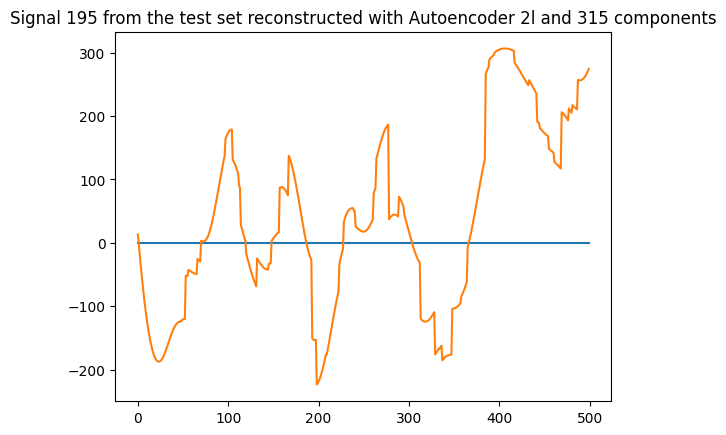

In [ ]:
graphical_TEST_auto2 = L_decoded_TEST_auto2[-1][:lmt,p] # plotting up until lmt, easier visualization
graph_ypca2 = Y_PCA[:lmt,p]

plt.plot(graph_ypca2)
plt.plot(graphical_TEST_auto2)
plt.title('Signal ' + str(p) + ' from the test set reconstructed with Autoencoder 2l and ' + str(n) +' components')

# Autoencoder recurrent #

On applique ici la méthode AUTOENCODER recurrent pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests. Téléchargez le fichier .pkl pour récuperer les donnés obtenues à partir d'essaies antérieures

In [ ]:
# ### Récupération de l'apprentissage déjà stocké
# print('Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations')
# with open(file_path+'auto_rec.pkl', 'rb') as file:
#         [L_rec_train,L_rec_ints_TEST] = pickle.load(file)

Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations


Application du méthode. Enlevez les # (Ctrl + /) pour faire tourner avec des altérations. Normalement, cela prends beaucoup de temps.

In [ ]:

L_rec_train = []
L_rec_ints_TEST = []
start_time = time.time()
for n in L_n:
  start_ar = time.time()
  turns_rec = 50
  latent_dim_rec = n
  input_data_rec = X
  maximum_rec = np.amax(input_data_rec)
  input_data_rec = input_data_rec/maximum_rec
  maximum_test_rec = np.amax(Y_PCA)
  input_dim_rec = input_data_rec.shape
  input_test_rec = Y_PCA/maximum_test_rec
  x_train = input_data_rec.reshape(input_dim_rec[0], 1 , input_dim_rec[1])
  x_test = input_test_rec.reshape(input_dim_rec[0], 1 , input_dim_rec[1])
  ###### Autoencoder LSTM ######
  encoder_rec = models.Sequential([
      layers.Input(shape= (x_train.shape[1],x_train.shape[2])),
      layers.LSTM(latent_dim_rec),
      layers.RepeatVector(1)
  ])
  encoder_rec.summary()
  decoder_rec = models.Sequential([layers.LSTM(latent_dim_rec, return_sequences=True),
                                   layers.Dense(x_train.shape[2], activation = 'tanh')])
  # Autoencoder
  autoencoder_rec = keras.Model(inputs=encoder_rec.input, outputs=decoder_rec(encoder_rec.output))
  autoencoder_rec.summary()

  autoencoder_rec.compile(loss='mse', optimizer='adam')

  history_rec = autoencoder_rec.fit(x_train, x_train,
                  epochs=turns_rec, verbose=0) # Fitting to train data

  aut_predict_rec = autoencoder_rec.predict(x_train)*maximum_rec
  aut_TEST_rec = autoencoder_rec.predict(x_test)*maximum_test_rec # PREDICT FOR TEST, NO FITTING

  decoded_vector_rec = aut_predict_rec.reshape(input_data_rec.shape)
  L_rec_train.append(decoded_vector_rec)
  decoded_TEST_rec = aut_TEST_rec.reshape(input_test_rec.shape)
  L_rec_ints_TEST.append(decoded_TEST_rec)
  end_ar = time.time()
  time_ar = end_ar-start_ar
  print(time_ar)



In [ ]:
# file_path = r'/content/drive/MyDrive/PJE 9/auto_rec.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump([L_rec_train, L_rec_ints_TEST], file)

**Visualization**

Text(0.5, 1.0, 'Signal 195 reconstructed with Autoencoder LSTM315 components')

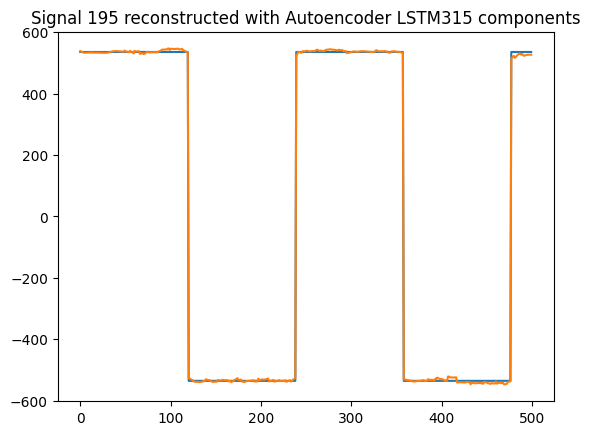

In [ ]:
lmt = 500

plt.figure()
graphical_data_rec =  L_rec_train[-1][:lmt,p]
graph_rec = X[:lmt,p]
plt.plot(graph_rec)
plt.plot(graphical_data_rec)
plt.title('Signal ' + str(p) + ' reconstructed with Autoencoder LSTM' + str(n) +' components')

Text(0.5, 1.0, 'Signal 20 from the test set reconstructed with Autoencoder LSTM and 315 components')

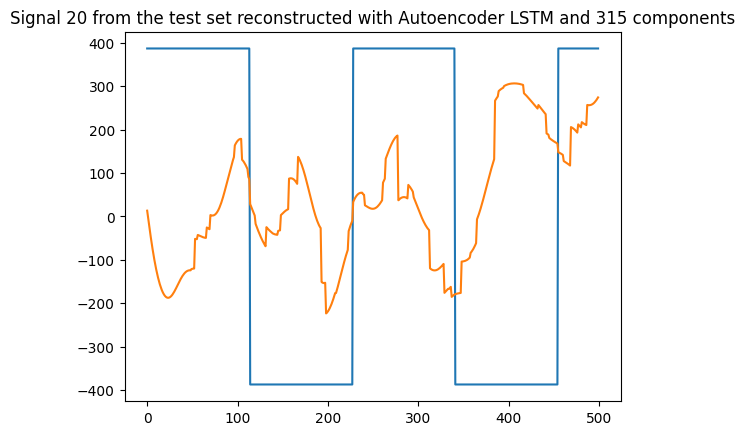

In [ ]:
pt = 20
graphical_TEST_rec= L_rec_ints_TEST[-1][:lmt,pt] # plotting up until lmt, easier visualization
graph_ypca2 = Y_PCA[:lmt,pt]
plt.plot(graph_ypca2)
plt.plot(graphical_TEST_auto2)
plt.title('Signal ' + str(pt) + ' from the test set reconstructed with Autoencoder LSTM and ' + str(n) +' components')


# VAE #

On applique ici la méthode AUTOENCODER VAE pour pouvoir réaliser l'apprentissage et reconstruire les signaux training + tests. Téléchargez le fichier .pkl pour récuperer les donnés obtenues à partir d'essaies antérieures

In [ ]:
# ### Récupération de l'apprentissage déjà stocké
# print('Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations')
# with open(file_path+'auto_vae.pkl', 'rb') as file:
#         [L_vae_train,L_vae_ints_TEST] = pickle.load(file)

Code is loading data from previously run autoencoder to save on time. Download .pkl files to avoid error. PLease uncomment cell below if you want to run with new configurations


Application du méthode. Enlevez les # (Ctrl + /) pour faire tourner avec des altérations. Normalement, cela prends beaucoup de temps.

In [ ]:
from keras import backend


def sampling(args):
    z_mean, z_log_sigma = args
    batch = backend.shape(z_mean)[0]
    dim = backend.shape(z_mean)[1]
    epsilon =backend.random_normal(shape=(batch, 2), mean = 0, stddev = 1)
    return z_mean + backend.exp(0.5 * z_log_sigma) * epsilon

L_vae_train = []
L_vae_ints_TEST = []
for n in L_n:
    start_vae = time.time()
    turns_vae = 300 ### oui, c'est necessaire pour convergence
    int_dim_vae = n
    input_data_vae = X
    maximum_vae = np.amax(input_data_vae)
    input_data_vae = input_data_vae/maximum_vae
    maximum_test_vae = np.amax(Y_PCA)
    input_dim_vae = input_data_vae.shape
    input_test_vae = Y_PCA/maximum_test_vae

    x_train = input_data_vae
    latent_dim_vae = 2 # MEAN AND STD

    # Define the VAE model
    original_dim = input_data_vae.shape[1]

    # Encoder
    encoder_inputs = layers.Input(shape=(original_dim,))
    h = layers.Dense(int_dim_vae, activation='tanh', name = 'Encoder_hidden')(encoder_inputs)
    z_mean = layers.Dense(latent_dim_vae, name="z_mean")(h)
    z_log_sigma = layers.Dense(latent_dim_vae, name="z_sig")(h)

    # Sample z
    z = layers.Lambda(sampling, output_shape=(latent_dim_vae,), name = 'Sampling')([z_mean, z_log_sigma])

    encoder_vae = keras.Model(encoder_inputs, [z_mean, z_log_sigma, z], name="encoder")
    encoder_vae.summary()

    # Decoder
    latent_inputs = keras.Input(shape=(latent_dim_vae,))
    decoder_h = layers.Dense(int_dim_vae, activation='tanh', name = 'Decoder_hidden')(latent_inputs)
    decoded_vae = layers.Dense(original_dim, activation='tanh', name = 'Output_layer')(decoder_h)
    decoder_vae = keras.Model(latent_inputs, decoded_vae, name="decoder")
    decoder_vae.summary()

    # End-to-end VAE model
    outpt = decoder_vae(encoder_vae(encoder_inputs)[2]) # note, outputs available from encoder model are z_mean, z_log_sigma and z. We take z by specifying [2]

    autoencoder_vae = keras.Model(inputs=encoder_inputs, outputs=outpt, name  = 'autoencoder')
    autoencoder_vae.summary()

    # # Define custom loss function for VAE
    r_loss = original_dim * keras.losses.mse(encoder_inputs, outpt)  # use MSE

    # KL divergence loss compares the encoded latent distribution Z with standard Normal distribution and penalizes if it's too different
    kl_loss =  -0.5 * backend.sum(1 + z_log_sigma - backend.square(z_mean) - backend.exp(z_log_sigma), axis = 1)

    # The VAE loss is a combination of reconstruction loss and KL loss
    vae_loss = backend.mean(r_loss + kl_loss)

    # Add loss to the model and compile it
    autoencoder_vae.add_loss(vae_loss)
    autoencoder_vae.compile(optimizer='adam')
    history_vae = autoencoder_vae.fit(x_train, x_train,
                    epochs=turns_vae, verbose=0) # Fitting to train data

    aut_predict_vae = autoencoder_vae.predict(x_train)*maximum_vae
    aut_TEST_vae = autoencoder_vae.predict(input_test_vae)*maximum_test_vae # PREDICT FOR TEST, NO FITTING

    decoded_vector_vae = aut_predict_vae.reshape(input_data_vae.shape)
    L_vae_train.append(decoded_vector_vae)
    decoded_TEST_vae = aut_TEST_vae.reshape(input_test_vae.shape)
    L_vae_ints_TEST.append(decoded_TEST_vae)
    end_vae = time.time()
    time_vae = end_vae-start_vae
    print(time_vae)

La cellule ci-dessous garde les données obtenues. Spécifiez votre file path si vous voulez garder vos résultats

In [ ]:
# file_path = r'/content/drive/MyDrive/PJE 9/auto_vae.pkl'
# with open(file_path, 'wb') as file:
#     pickle.dump([L_vae_train, L_vae_ints_TEST], file)

**Visualization**

Text(0.5, 1.0, 'Signal 195 reconstructed with VAE315 components')

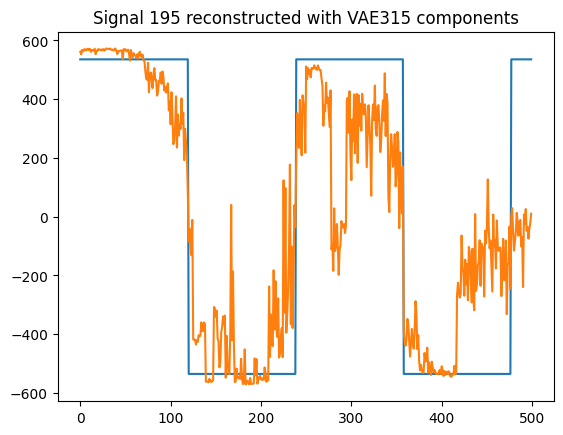

In [ ]:
lmt = 500

graphical_data_vae =  L_vae_train[-1][:lmt,p]
graph_vae = X[:lmt,p]
plt.plot(graph_vae)
plt.plot(graphical_data_vae)
plt.title('Signal ' + str(p) + ' reconstructed with VAE' + str(n) +' components')

Text(0.5, 1.0, 'Signal 20 from the test set reconstructed with Autoencoder 2l and 315 components')

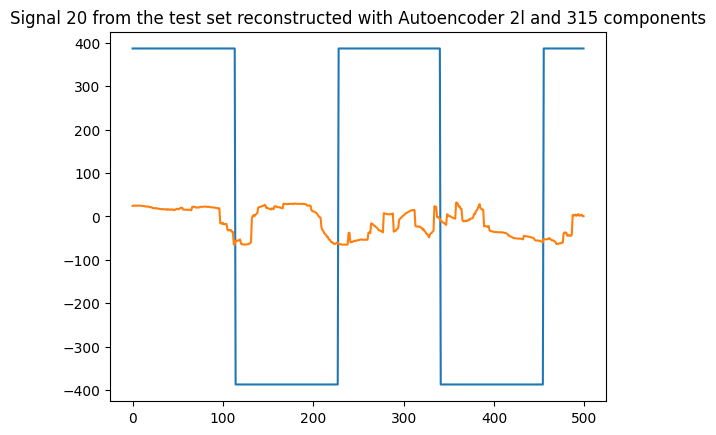

In [ ]:
pt = 20
graphical_TEST_vae= L_vae_ints_TEST[-1][:lmt,pt] # plotting up until lmt, easier visualization
graph_ypca2 = Y_PCA[:lmt,pt]
plt.plot(graph_ypca2)
plt.plot(graphical_TEST_vae)
plt.title('Signal ' + str(pt) + ' from the test set reconstructed with Autoencoder 2l and ' + str(n) +' components')



# Time computation #

Ici on analyse le temps d'apprentissage de chacune des méthodes

In [ ]:
time_data = {'Temps exécution PCA' : t_PCA,
             'Temps exécution Kernel PCA' : t_k_PCA,
             #'Temps exécution NMF' : t_NMF,
             #'Temps exécution Sparse PCA' : t_s_PCA,
             'Temps exécution Truncated SVD' : t_SVD
             #'Temps exécution Autoencoder': t_auto
            }

dt = pd.DataFrame(time_data, index = L_n)

**Tracé des temps d'exécution**

In [ ]:
fig_t = px.line(dt,
               title = 'Temps apprentissage en fonction de n',
              )
fig_t.update_layout(xaxis_title = "Nombre de composantes de réduction",
                  yaxis_title = "Temps d apprentissage en secondes"

                 )
fig_t.add_trace(go.Scatter(x=[L_n[v] for v in range(len(L_n))], y=[101 for q in range(len(L_n))],
                           name='Autoencoder 1 couche',
                           line = dict(width=4, dash='dash')
                          )
                )
fig_t.add_trace(go.Scatter(x=[L_n[v] for v in range(len(L_n))], y=[101 for q in range(len(L_n))],
                           name='Autoencoder 2 couches',
                           line = dict(width=4, dash='dash')
                          )
                )
fig_t.add_trace(go.Scatter(x=[L_n[v] for v in range(len(L_n))], y=[350 for q in range(len(L_n))],
                           name='Autoencoder recurrent',
                           line = dict(width=4, dash='dash')
                          )
                )
fig_t.add_trace(go.Scatter(x=[L_n[v] for v in range(len(L_n))], y=[430 for q in range(len(L_n))],
                           name='Autoencoder VAE',
                           line = dict(width=4, dash='dash')
                          )
                )

fig_t.update_layout(
    width=1200,  # Set the width of the plot
    height=700  # Set the height of the plot
)
fig_t.show()

# Data_reconstruite

On récupère les données reconstruites lors de chacune des méthodes

In [ ]:
Data_reconstruite = [L_decoded_vectors_PCA,
                     L_decoded_vectors_k_PCA,
                     L_decoded_vectors_SVD,
                     L_decoded_vectors_auto1,
                     L_decoded_vectors_auto2,
                     L_rec_train,
                     L_vae_train
                    ]


Data_reconstruite_test =[L_test_PCA,
                    L_test_k_PCA,
                    L_test_SVD,
                    L_decoded_TEST_auto1,
                    L_decoded_TEST_auto2,
                    L_rec_ints_TEST,
                    L_vae_ints_TEST
                    ]

# Covariance

Le but de cette partie est de calculer la covariance entre données initiales et reconstruites pour chacune des données.
La formule utilisée est : \[cov(X_{initial}, X_{reconstruit}) = \frac{\sum_{k=1}^{n}{(X_{initial k} - \overline{X_{initial}})(X_{reconstruit k} - \overline{X_{reconstruit}})}}{n-1}\]


##Covariance computation about training data

###Calcul covariance for training data

In [ ]:
###Espace de normalisation
scaler_cov = MinMaxScaler()
scaler_cov_k = MinMaxScaler()

###Traitement
cov = []     #On stocke les valeurs moyennes de covariance par génération dans cette liste
cov_k = []   #On stocke les valeurs moyennes de covariance par signal dans une génération dans cette liste
for elt in Data_reconstruite:
  E = elt
  cov_method = []
  cov_method_k = []
  for ig in range(len(E)):   #ig for index_generation
    cov_signal_n = []
    for isgnl in range(len(E[ig][0])):        #isgnl for i_signal
      sum = 0
      mean_X = X[:, isgnl].mean()
      mean_E = E[ig][:, isgnl].mean()
      for it in range(len(E[ig])):            #it for time_index
        sum += ((X[it][isgnl] - mean_X) * (E[ig][it][isgnl] - mean_E)) / (len(E[ig])-1)  #Formule cov
      cov_signal_n.append(sum)
    cov_method_k.append(cov_signal_n)
    cov_method.append([statistics.mean(cov_signal_n)])   #les [] sont à des fins de normalisation car MinMaxScaler normalise par rapport aux lignes d'un tableau
  cov_method = scaler_cov.fit_transform(cov_method)      #Normalisation des valeurs moyennes de MSE sur l'ensemble des générations d'une méthode

  cov.append([cov_method[k,0] for k in range(len(cov_method))])
  cov_method_k = scaler_cov_k.fit_transform(cov_method_k)
  cov_k.append(cov_method_k)


###Covariance = f(n) for training data

Idea is to plot the y = mean covariance for generations
                    x = Number of components of reduction  
                    -> Line graphs
It helps us to understand how many components are needed to minimize the covariance (= dispersion)

In [ ]:
dic_cov = {}
ind = 0
for methode in methods:
  dic_cov['Covariance ' + str(methode)] = cov[ind]
  ind += 1

df_cov = pd.DataFrame(dic_cov, index = L_n)

**Graphical visualisation of covariance against number of components**

In [ ]:
fig = px.line(df_cov,
              title = 'Covariance en fonction du nombre de composante sur '+ str(len(L_n)) + ' générations of training data')
fig.update_layout(xaxis_title = "Nombre n de composantes de réduction",
                  yaxis_title = "Valeur covariance"
                 )
fig.show()

Idea is to plot covariance for each signal -> Bar graphs

It helps us to understand the distribution of covariance within a generation

###Statistical analysis on 1 generation for training data

Choix de la génération que l'on veut analyser

In [ ]:
k = gen  #Choisir quel numéro de génération on veut étudier. 1 pour la première génération, len(L_n) pour la dernière génération
n = L_n[k]

**Traitement**

In [ ]:
dic_cov_n = {}
ind = 0
for methode in methods:
  dic_cov_n['Covariance ' + str(methode)] = cov_k[ind][k]
  ind += 1
df_cov_n = pd.DataFrame(dic_cov_n,
                        index = [p for p in range(len(X[0]))]
                        )



**Visualisation**

In [ ]:
fig = px.line(df_cov_n,
             title = 'Covariance of different methods with ' + str(n) +' components of reduction of training data',
            )
fig.update_layout(xaxis_title = 'N° signal',
                  yaxis_title = 'Value of covariance'
                  )
fig.show()

##Covariance computation about testing data




###Calcul covariance for testing data





In [ ]:
from sklearn.metrics import mean_squared_error
scaler_cov_test = MinMaxScaler()
scaler_cov_k_test = MinMaxScaler()
cov_test = []
cov_k_test = []
for elt in Data_reconstruite_test:
  n_signal, n_gen = len(Y_np[0]), len(elt)
  cov_method, cov_method_k = [], []
  E = elt
  for ig in range(n_gen):   #ig for index_generation
    cov_signal = []
    for isgnl in range(n_signal):        #isgnl for index_signal
      sum_test = 0
      mean_Y = Y_np[:, isgnl].mean()
      mean_E = E[ig][:, isgnl].mean()
      for it in range(len(E[ig])):            #it for time_index
        sum_test += ((Y_np[it][isgnl] - mean_Y) * (E[ig][it][isgnl] - mean_E)) / len(E[ig])
      cov_signal.append(sum_test)
    cov_method_k.append(cov_signal)
    cov_method.append([statistics.mean(cov_signal)])                     #Normalisation des valeurs de chaque méthodes indépendantes
  cov_method = scaler_cov_test.fit_transform(cov_method)                 #Normalisation des valeurs de chaque méthodes indépendantes
  cov_test.append([cov_method[k,0] for k in range(len(cov_method))])     #Normalisation des valeurs de chaque méthodes indépendantes
  cov_method_k = scaler_cov_k_test.fit_transform(cov_method_k)
  cov_k_test.append(cov_method_k)




###Covariance = f(n) for testing data

In [ ]:
dic_cov = {}
ind = 0
for methode in methods:
  dic_cov['Covariance ' + str(methode)] = cov_test[ind]
  ind += 1

df_cov = pd.DataFrame(dic_cov, index = L_n)

In [ ]:
fig = px.line(df_cov,
              title = 'Covariance en fonction du nombre de composante sur '+ str(len(L_n)) + ' générations pour les data tests')
fig.update_layout(xaxis_title = "Nombre n de composantes de réduction",
                  yaxis_title = "Valeur covariance"
                 )
fig.show()

###Statistical analysis on 1 generation for testing data

In [ ]:
k = gen  #Choisir quel numéro de génération on veut étudier. 1 pour la première génération, len(L_n) pour la dernière génération
n = L_n[k]

In [ ]:
dic_cov_n = {}
ind = 0
for methode in methods:
  dic_cov_n['Covariance ' + str(methode)] = cov_k_test[ind][k]
  ind += 1
df_cov_n = pd.DataFrame(dic_cov_n,
                        index = [p for p in range(len(Y_np[0]))]
                        )



In [ ]:
fig = px.bar(df_cov_n,
             title = 'Covariance of different methods with ' + str(n) +' components of reduction of data test',
            )
fig.update_layout(xaxis_title = 'N° signal',
                  yaxis_title = 'Value of covariance'
                  )
fig.show()

#MSE#

Le but de cette partie est de calculer l'erreur des moindres carrés entre données initiales et reconstruites.
Le calcul est réalisé à partir de la méthode sk_learn mean_squarred_error

##MSE computation about training data

###Calcul MSE for training data

In [ ]:
##Avec normalisation
scaler_mse_= MinMaxScaler()
scaler_mse_k = MinMaxScaler()
mse = []
mse_k = []
for elt in Data_reconstruite:
  E = elt
  mse_method = []
  mse_method_k = []
  for ig in range(len(E)):   #ig for index_generation
    mse_signal_n = []
    for isgnl in range(len(E[ig][0])):        #isgnl for i_signal
      mse_indiv = mean_squared_error(X[:, isgnl], E[ig][:, isgnl])
      mse_signal_n.append(mse_indiv)
    mse_method_k.append(mse_signal_n)
    mse_method.append([statistics.mean(mse_signal_n)])   #les [] sont à des fins de normalisation car MinMaxScaler normalise par rapport aux lignes d'un tableau
  mse_method = scaler_cov.fit_transform(mse_method)      #Normalisation des valeurs moyennes de MSE sur l'ensemble des générations d'une méthode

  mse.append([mse_method[k,0] for k in range(len(mse_method))])
  mse_method_k = scaler_mse_k.fit_transform(mse_method_k)
  mse_k.append(mse_method_k)


In [ ]:
# # ##Sans normalisation
# scaler_mse_= MinMaxScaler()
# scaler_mse_k = MinMaxScaler()
# mse = []
# mse_k = []
# for elt in Data_reconstruite:
#   E = elt
#   mse_method = []
#   mse_method_k = []
#   for ig in range(len(E)):   #ig for index_generation
#     mse_signal_n = []
#     for isgnl in range(len(E[ig][0])):        #isgnl for i_signal
#       mse_indiv = mean_squared_error(X[:, isgnl], E[ig][:, isgnl])
#       mse_signal_n.append(mse_indiv)
#     mse_method_k.append(mse_signal_n)
#     mse_method.append(statistics.mean(mse_signal_n))   #les [] sont à des fins de normalisation car MinMaxScaler normalise par rapport aux lignes d'un tableau
#   mse.append(mse_method)
#   mse_k.append(mse_method_k)

###MSE = g(n) for training data

In [ ]:
ind = 0
dic_mse = {}
for methode in methods:
  dic_mse['MSE ' + str(methode)] = mse[ind]
  ind += 1
df_mse = pd.DataFrame(dic_mse,
                      index = L_n)

In [ ]:
fig_mse = px.line(df_mse,
                  title = 'MSE of different methods, training data',
                  log_y=True
                  )
fig_mse.update_layout(xaxis_title = 'Number of reduction component',
                      yaxis_title = 'Value of MSE'
                     )
fig_mse.update_layout(
    width=1200,  # Set the width of the plot
    height=700  # Set the height of the plot
)

fig_mse.show()

###Statistical analysis on 1 generation for training data

Traitement

In [ ]:
k = gen  #Choisir quel numéro de génération on veut étudier. 1 pour la première génération, len(L_n) pour la dernière génération
n = L_n[k]

In [ ]:
dic_mse_n = {}
ind = 0
for methode in methods:
  dic_mse_n['MSE ' + str(methode)] = mse_k[ind][k]
  ind += 1
df_mse_n = pd.DataFrame(dic_mse_n,
                        index = [p for p in range(len(X[0]))]
                        )

Visualisation

In [ ]:
fig = px.scatter(df_mse_n,
             title = 'MSE of different methods with ' + str(n) +' components of reduction, training data',
            )
fig.update_layout(xaxis_title = 'N° signal',
                  yaxis_title = 'Value of MSE',
    width=1200,  # Set the width of the plot
    height=700
                  )

##MSE computation about testing data

###Calcul MSE for testing data

Mettre en commentaire celui qu'on ne veut pas. Si on veut la normalisation ou pas

In [ ]:
# ##Avec normalisation
# from sklearn.metrics import mean_squared_error
# scaler_MSE_test = MinMaxScaler()
# scaler_MSE_k_test = MinMaxScaler()
# mse_test = []
# mse_k_test = []
# for elt in Data_reconstruite_test:
#   n_signal, n_gen = len(Y_np[0]), len(elt)
#   mse_method, mse_method_k = [], []
#   E = elt
#   for ig in range(n_gen):   #ig for index_generation
#     MSE_signal = []
#     for isgnl in range(n_signal):        #isgnl for index_signal
#       mse_indiv_test = mean_squared_error(Y_np[:, isgnl], E[ig][:, isgnl])
#       MSE_signal.append(mse_indiv_test)
#       #print(mean_squared_error(X[:, isgnl], E[ig][:, isgnl]))
#     mse_method_k.append(MSE_signal)
#     mse_method.append([statistics.mean(MSE_signal)])                     #Normalisation des valeurs de chaque méthodes indépendantes
#   mse_method = scaler_MSE_test.fit_transform(mse_method)                 #Normalisation des valeurs de chaque méthodes indépendantes
#   mse_test.append([mse_method[k,0] for k in range(len(mse_method))])     #Normalisation des valeurs de chaque méthodes indépendantes
#   mse_method_k = scaler_MSE_k_test.fit_transform(mse_method_k)
#   mse_k_test.append(mse_method_k)

In [ ]:
##Sans normalisation
from sklearn.metrics import mean_squared_error
scaler_MSE_test = MinMaxScaler()
scaler_MSE_k_test = MinMaxScaler()
mse_test = []
mse_k_test = []
for elt in Data_reconstruite_test:
  n_signal, n_gen = len(Y_np[0]), len(elt)
  mse_method, mse_method_k = [], []
  E = elt
  for ig in range(n_gen):   #ig for index_generation
    MSE_signal = []
    for isgnl in range(n_signal):        #isgnl for index_signal
      mse_indiv_test = mean_squared_error(Y_np[:, isgnl], E[ig][:, isgnl])
      MSE_signal.append(mse_indiv_test)
      #print(mean_squared_error(X[:, isgnl], E[ig][:, isgnl]))
    mse_method_k.append(MSE_signal)
    mse_method.append(statistics.mean(MSE_signal))                     #Normalisation des valeurs de chaque méthodes indépendantes
  mse_test.append(mse_method)     #Normalisation des valeurs de chaque méthodes indépendantes
  mse_k_test.append(mse_method_k)

###MSE = g(n) for testing data

In [ ]:
ind = 0
dic_mse = {}
for methode in methods:
  dic_mse['MSE ' + str(methode)] = mse_test[ind]
  ind += 1
df_mse = pd.DataFrame(dic_mse,
                      index = L_n)

In [ ]:
fig_mse = px.line(df_mse,
                  title = 'MSE of different methods for testing data',
                  log_y=True
            )
fig_mse.update_layout(xaxis_title = 'Number of reduction component',
                      yaxis_title = 'Value of MSE',
                      width = 1200,
                      height = 700
                     )
fig_mse.show()

###Statistical analysis on 1 generation for testing data

Traitement

In [ ]:
k = gen  #Choisir quel numéro de génération on veut étudier. 1 pour la première génération, len(L_n) pour la dernière génération
n = L_n[k]

In [ ]:
dic_mse_n = {}
ind = 0
for methode in methods:
  dic_mse_n['MSE ' + str(methode)] = mse_k_test[ind][k]
  ind += 1
df_mse_n = pd.DataFrame(dic_mse_n,
                        index = [p for p in range(len(Y_np[0]))]
                        )

Visualisation

In [ ]:
fig = px.scatter(df_mse_n,
             title = 'MSE of different methods with ' + str(n) +' components of reduction, test data',
            )
fig.update_layout(xaxis_title = 'N° signal',
                  yaxis_title = 'Value of MSE',
                    width = 1200,
                    height = 700
                  )

Visualisation + moyennes + ecarts-types

In [ ]:
fig = px.line(df_mse_n,
             title = 'MSE of different methods with ' + str(n) +' components of reduction',
            )
fig.update_layout(xaxis_title = 'N° signal',
                  yaxis_title = 'Value of MSE'
                  )
ind = 0
L_mean = []
L_sd = []
for methode in mse_k_test:
  mean = statistics.mean(methode[k]) # Mean of covariance of all signals
  sd = statistics.stdev(methode[k])  # Standard deviation of covariance of all signals
  fig.add_trace(go.Scatter( x = [p for p in range(len(mse_k_test[ind][k]))],
                            y = [mean for p in range(len(mse_k_test[ind][k]))],
                            name = 'mean for method ' + str(methods[ind])
                          )
               )
  fig.add_trace(go.Scatter( x = [p for p in range(len(mse_k_test[ind][k]))],
                            y = [sd for p in range(len(mse_k_test[ind][k]))],
                            name = 'standard deviation for method ' + str(methods[ind])
                          )
               )
  L_mean.append(mean)
  L_sd.append(sd)
  ind += 1

mean_base = statistics.mean(X[:,0])
sd_base =  statistics.stdev(X[:,0])
fig.add_trace(go.Scatter( x = [k for k in range(len(mse_k_test[0][0]))],
                         y = [mean_base for k in range(len(mse_k_test[0][0]))],
                         name = 'mean for method of initial dataset')
                       )
fig.add_trace(go.Scatter( x = [k for k in range(len(mse_k_test[0][0]))],
                         y = [sd_base for k in range(len(mse_k_test[0][0]))],
                         name = 'standard deviation of initial dataset')
                       )
fig.show()

#Comparaison variation fréquence / variation covariance

Cette partie permet de vérifier la corrélation entre dispersion des résultats lors de la reconstruction et hautes fréquences dans la base de données

## Allure

In [ ]:
from plotly.subplots import make_subplots
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=df_four_val_max.index, y=[df_four_val_max.values[k,0] for k in range(len(df_four_val_max.values))], name="Fréquence (Hz)"),
    secondary_y=False,
)

fig.add_trace(
    go.Line(x=df_four_val_max.index, y=df_cov_n['Covariance PCA'].to_numpy(), name="Covariance PCA"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Comparaison variation fréquence/covariance avec 136 composantes de réduction, c'est à dire un ratio de réduction de " + str(round(100 - abs(100*136/len(X[0])),2)) + "%"
)

# Set x-axis title
fig.update_xaxes(title_text="n° signal")

# Set y-axes titles
fig.update_yaxes(title_text="Fréquence (Hz)", secondary_y=False)
fig.update_yaxes(title_text="Covariance", secondary_y=True)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




##Taux de réduction vs covariance

In [ ]:
dic_cov = {}
ind = 0
for methode in methods:
  dic_cov['Covariance ' + str(methode)] = cov[ind]
  ind += 1

L_taux_red = [100 - 100*L_n[p]/len(X[0]) for p in range(len(L_n))]
df_cov = pd.DataFrame(dic_cov, index = L_taux_red)

**Graphical visualisation of covariance against reduction rate**

In [ ]:
fig = px.line(df_cov,
              title = 'Covariance en fonction du taux de réduction de données sur '+ str(len(L_n)) + ' générations de training data')
fig.update_layout(xaxis_title = "Taux de réduction de données %",
                  yaxis_title = "Valeur covariance"
                 )
fig.show()